In [1]:
cd ..

/home/janek/reasonable-embeddings


In [2]:
import numpy as np
import pandas as pd
import torch as T
import torch.nn.functional as F
import torch.nn as nn
from sklearn import metrics

from src.reasoner_mod import *
from src.generate import load_dataset
from src.reasoner import *
from src.utils import *
from src.vis import *

In [3]:
seed = 2022
dataset_path = 'local/out/dataset/sub-100.json'
ts = timestr()
train_onto, test_onto, data_tr, data_vl, data_te = load_dataset(dataset_path)

emb_size = 10
hidden_size = 16
epoch_count = 15
test_epoch_count = 10
batch_size = 32

T.manual_seed(seed)

trained_reasoner = ModifiedReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
encoders = [ModifiedEmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in train_onto]

print(f'created reasoner with {paramcount(trained_reasoner)} parameters')
print(f'created {len(encoders)} encoders with {paramcount(encoders[0])} parameters each')

train_logger = train_mod(data_tr, data_vl, trained_reasoner, encoders, epoch_count=epoch_count, batch_size=batch_size, not_nn_loss_weight=0.1)

created reasoner with 3283 parameters
created 40 encoders with 1270 parameters each
train epoch 00/15 | batch 2001/2000 | loss 0.7910 | val loss 0.7926 | acc 0.2131 | f1 0.3514 | prec 0.2131 | recall 1.0000 | roc auc 0.5142 | pr auc 0.2463 | elapsed 23.15s
train epoch 01/15 | batch 2001/2000 | loss 0.6245 | val loss 0.5218 | acc 0.8181 | f1 0.2588 | prec 0.9845 | recall 0.1490 | roc auc 0.5988 | pr auc 0.4224 | elapsed 79.10s
train epoch 02/15 | batch 2001/2000 | loss 0.4578 | val loss 0.4142 | acc 0.8363 | f1 0.4393 | prec 0.8136 | recall 0.3009 | roc auc 0.7820 | pr auc 0.6136 | elapsed 80.77s
train epoch 03/15 | batch 2001/2000 | loss 0.3565 | val loss 0.3532 | acc 0.8596 | f1 0.5759 | prec 0.8086 | recall 0.4472 | roc auc 0.8460 | pr auc 0.7154 | elapsed 77.77s
train epoch 04/15 | batch 2001/2000 | loss 0.2858 | val loss 0.3077 | acc 0.8864 | f1 0.6782 | prec 0.8561 | recall 0.5616 | roc auc 0.8800 | pr auc 0.7869 | elapsed 79.16s
train epoch 05/15 | batch 2001/2000 | loss 0.2338 |

In [4]:
input = T.rand(10)
print(input)
output = trained_reasoner.not_nn(trained_reasoner.not_nn(input))
print(output)

tensor([0.7046, 0.9691, 0.6363, 0.5471, 0.4491, 0.2415, 0.8017, 0.2631, 0.6155,
        0.7288])
tensor([0.7046, 0.9691, 0.6363, 0.5471, 0.4491, 0.2415, 0.8017, 0.2631, 0.6155,
        0.7289], grad_fn=<SqueezeBackward3>)


In [13]:
trained_reasoner.not_nn.weight

Parameter containing:
tensor([[-0.4007,  0.3774,  0.6091, -0.1011,  0.1057, -0.0642,  0.2744,  0.4307,
          0.0120,  0.1184],
        [ 0.4107, -0.1737,  0.1696, -0.0314,  0.2903,  0.4794,  0.3380,  0.2152,
          0.3876, -0.3145],
        [ 0.6332,  0.0829,  0.4980,  0.4064,  0.0055, -0.0639, -0.3744,  0.0238,
         -0.1174,  0.0406],
        [-0.0575, -0.0298,  0.4712, -0.1684,  0.2871,  0.1221,  0.1303, -0.6857,
         -0.3100, -0.1840],
        [ 0.0741,  0.3035, -0.1408,  0.2329, -0.1947, -0.3954,  0.4377, -0.4247,
          0.5161,  0.2362],
        [-0.1631,  0.4562, -0.0957,  0.1267, -0.2920,  0.7683, -0.0525, -0.0740,
         -0.0332,  0.1582],
        [ 0.2390,  0.4168, -0.3606,  0.1899,  0.4309, -0.0663,  0.3912,  0.1188,
         -0.4857,  0.0530],
        [ 0.4642,  0.1906,  0.0387, -0.7803, -0.4258, -0.1524,  0.1370,  0.0419,
         -0.0845, -0.0242],
        [ 0.0646,  0.5141, -0.1175, -0.3130,  0.5370, -0.0529, -0.5479, -0.1511,
          0.3618,  0.0066

In [19]:
print(T.round(T.matmul( trained_reasoner.not_nn.weight, trained_reasoner.not_nn.weight)*1000)/1000)

tensor([[1., 0., 0., -0., 0., -0., -0., -0., -0., 0.],
        [0., 1., 0., 0., 0., -0., -0., -0., 0., 0.],
        [-0., -0., 1., 0., -0., -0., 0., -0., 0., -0.],
        [-0., -0., 0., 1., -0., -0., 0., 0., -0., -0.],
        [0., -0., 0., 0., 1., -0., -0., -0., -0., 0.],
        [-0., -0., 0., -0., -0., 1., -0., -0., -0., 0.],
        [-0., -0., 0., -0., 0., -0., 1., -0., -0., 0.],
        [-0., 0., -0., 0., -0., 0., 0., 1., 0., -0.],
        [0., -0., 0., 0., 0., -0., -0., -0., 1., 0.],
        [0., -0., 0., 0., 0., -0., -0., -0., 0., 1.]], grad_fn=<DivBackward0>)


In [5]:
## --- TESTING
trained_test_encoders = {}
T.manual_seed(seed)
random_reasoner = ReasonerHead(emb_size=emb_size, hidden_size=hidden_size)
test_logger = TrainingLogger(validate=True, metrics=batch_stats)

for reasoner_name, reasoner in [('trained reasoner', trained_reasoner), ('random reasoner', random_reasoner)]:
    print(reasoner_name)
    T.manual_seed(seed)
    trained_test_encoders[reasoner_name] = test_encoders = [EmbeddingLayer.from_onto(onto, emb_size=emb_size) for onto in test_onto]
    if reasoner_name == 'trained reasoner':
        train_mod(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger, not_nn_loss_weight=0.1)
    else:
        train(data_te, None, reasoner, test_encoders, epoch_count=test_epoch_count, batch_size=batch_size, run_name=reasoner_name, freeze_reasoner=True, logger=test_logger)

trained reasoner
train epoch 00/10 | batch 1251/1250 | loss 1.1687 | val loss 1.1687 | acc 0.6271 | f1 0.3942 | prec 0.3047 | recall 0.5582 | roc auc 0.6494 | pr auc 0.4860 | elapsed 17.90s
train epoch 01/10 | batch 1251/1250 | loss 0.9804 | val loss 0.7686 | acc 0.7208 | f1 0.4742 | prec 0.4015 | recall 0.5791 | roc auc 0.7322 | pr auc 0.5624 | elapsed 38.49s
train epoch 02/10 | batch 1251/1250 | loss 0.6495 | val loss 0.5099 | acc 0.8023 | f1 0.5750 | prec 0.5396 | recall 0.6153 | roc auc 0.8138 | pr auc 0.6656 | elapsed 36.27s
train epoch 03/10 | batch 1251/1250 | loss 0.4449 | val loss 0.3589 | acc 0.8619 | f1 0.6778 | prec 0.6874 | recall 0.6685 | roc auc 0.8776 | pr auc 0.7674 | elapsed 38.46s
train epoch 04/10 | batch 1251/1250 | loss 0.3257 | val loss 0.2717 | acc 0.8998 | f1 0.7572 | prec 0.8000 | recall 0.7188 | roc auc 0.9190 | pr auc 0.8421 | elapsed 38.34s
train epoch 05/10 | batch 1251/1250 | loss 0.2554 | val loss 0.2188 | acc 0.9220 | f1 0.8083 | prec 0.8677 | recall 0.

In [6]:
with T.no_grad():
    idx_te, X_te, y_te = data_te
    _, _, Y_te_good = eval_batch_mod(trained_reasoner, trained_test_encoders['trained reasoner'], X_te, y_te, idx_te)
    _, _, Y_te_rand = eval_batch(random_reasoner, trained_test_encoders['random reasoner'], X_te, y_te, idx_te)

local/out/exp/20240625T144730


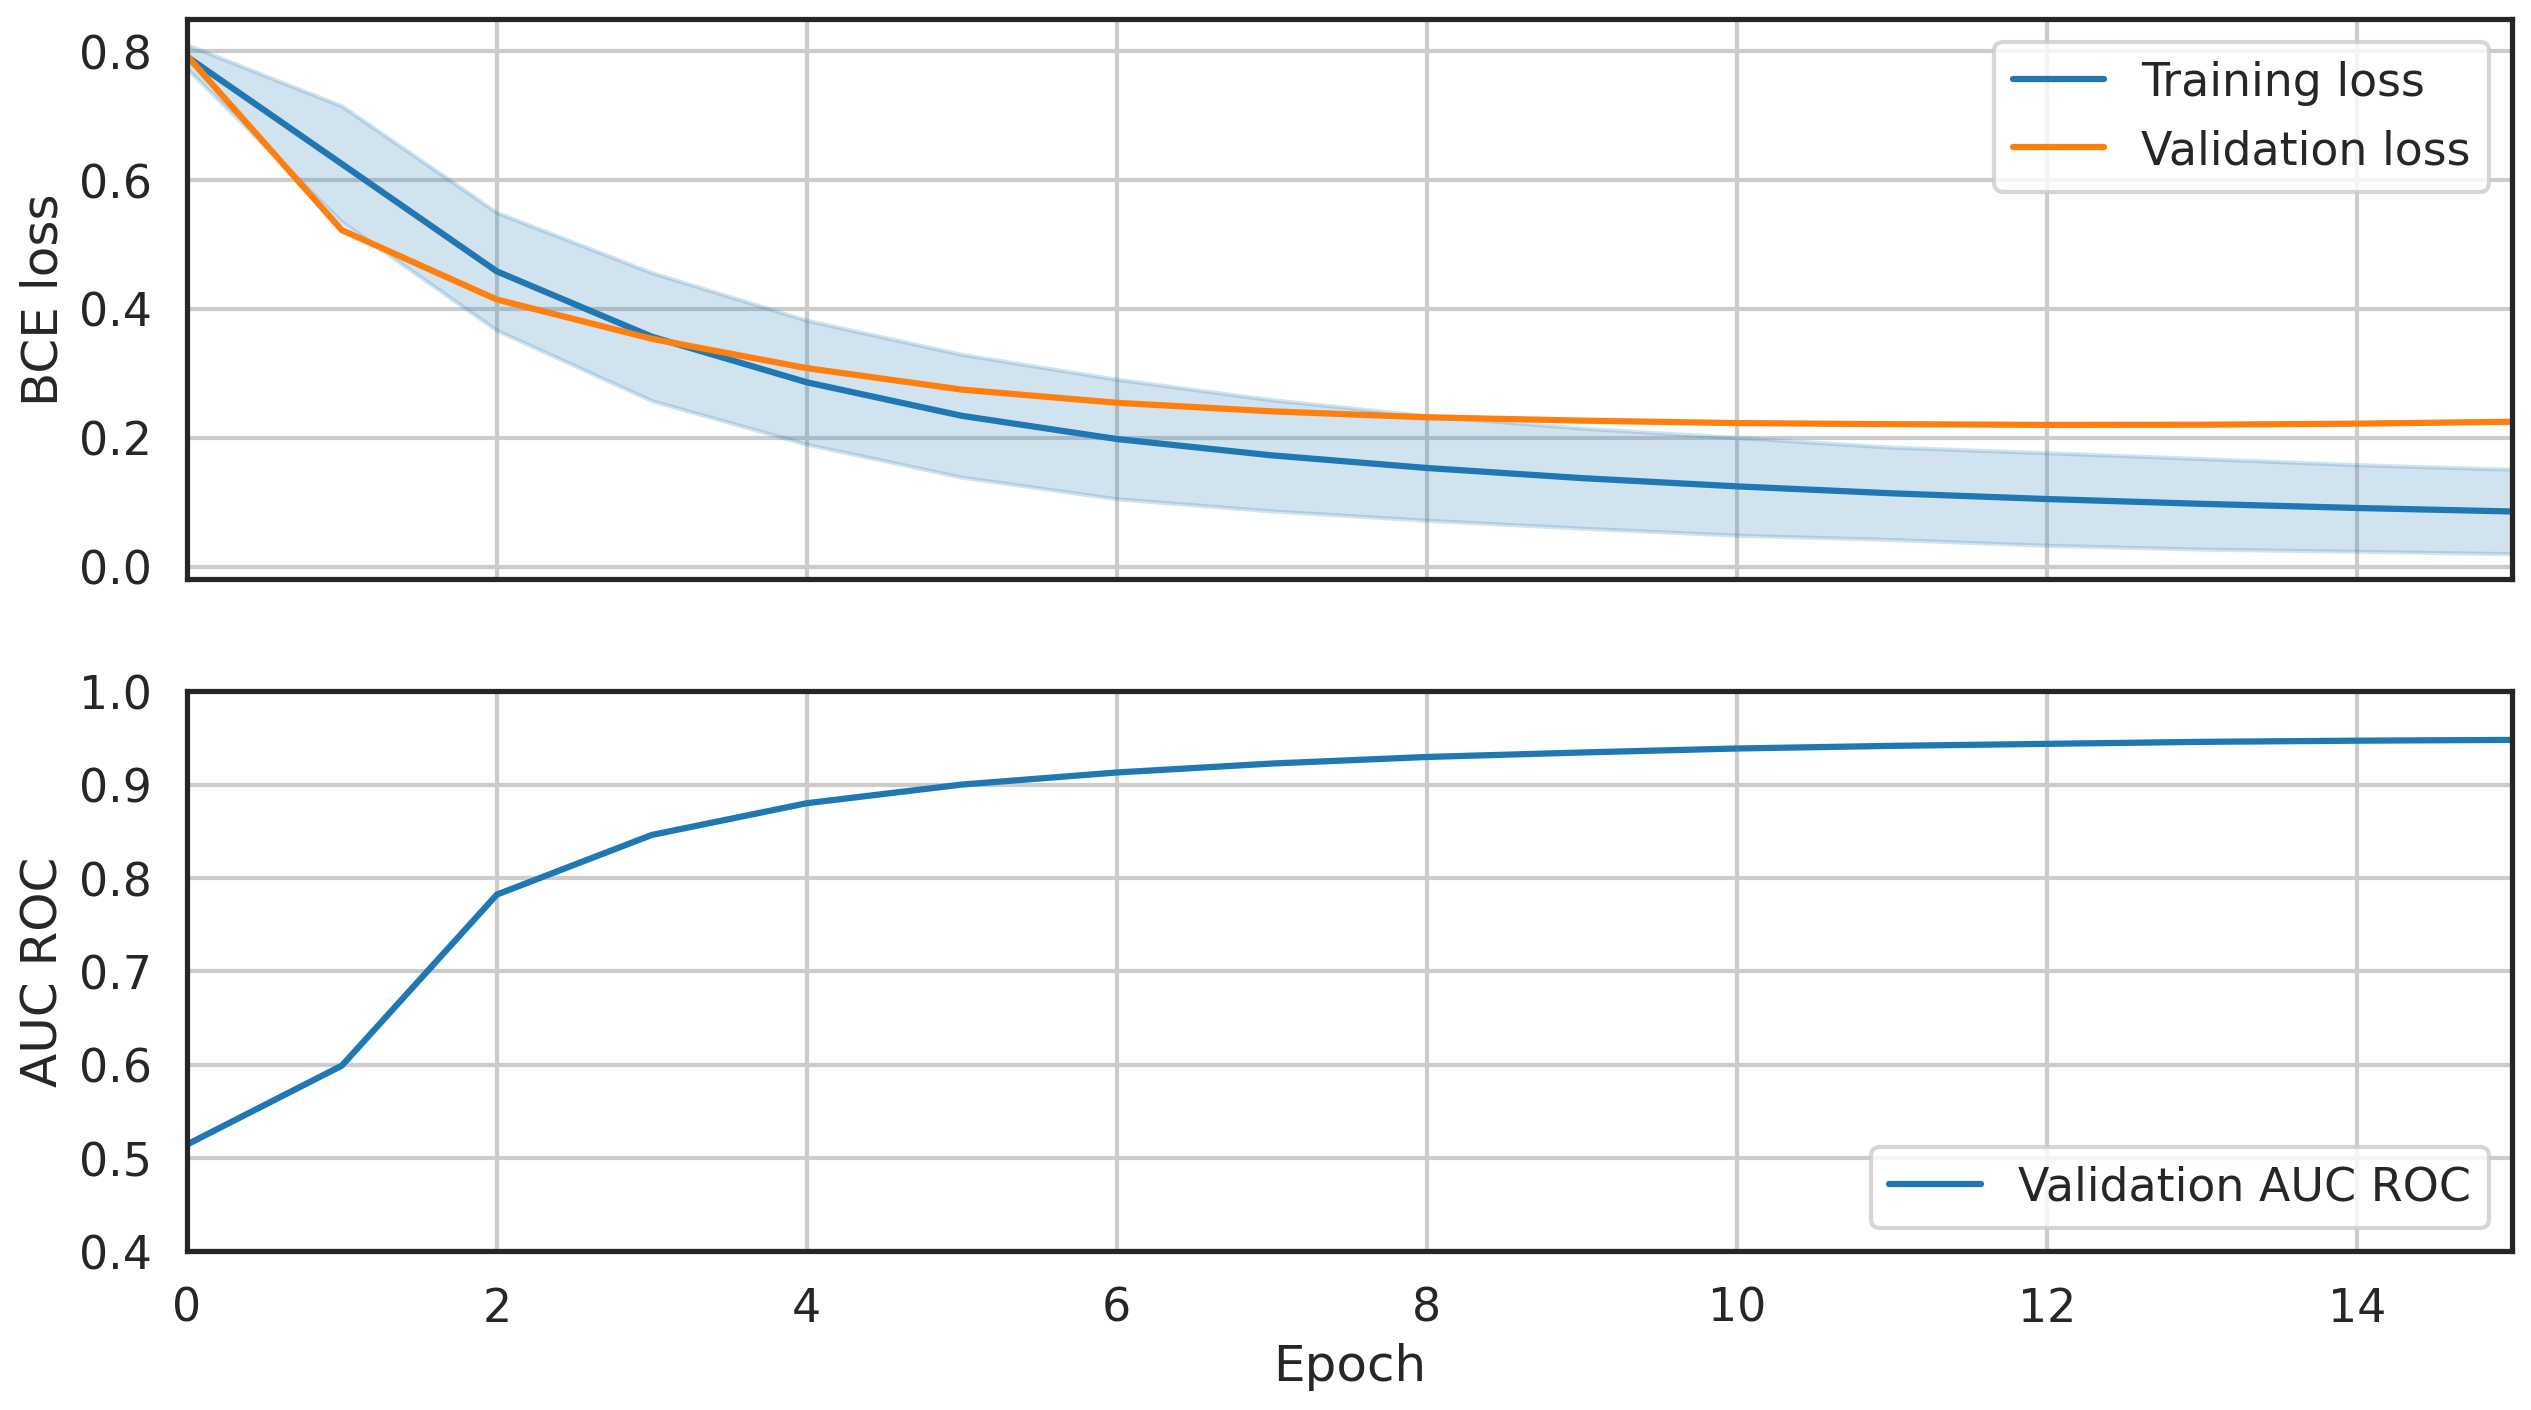

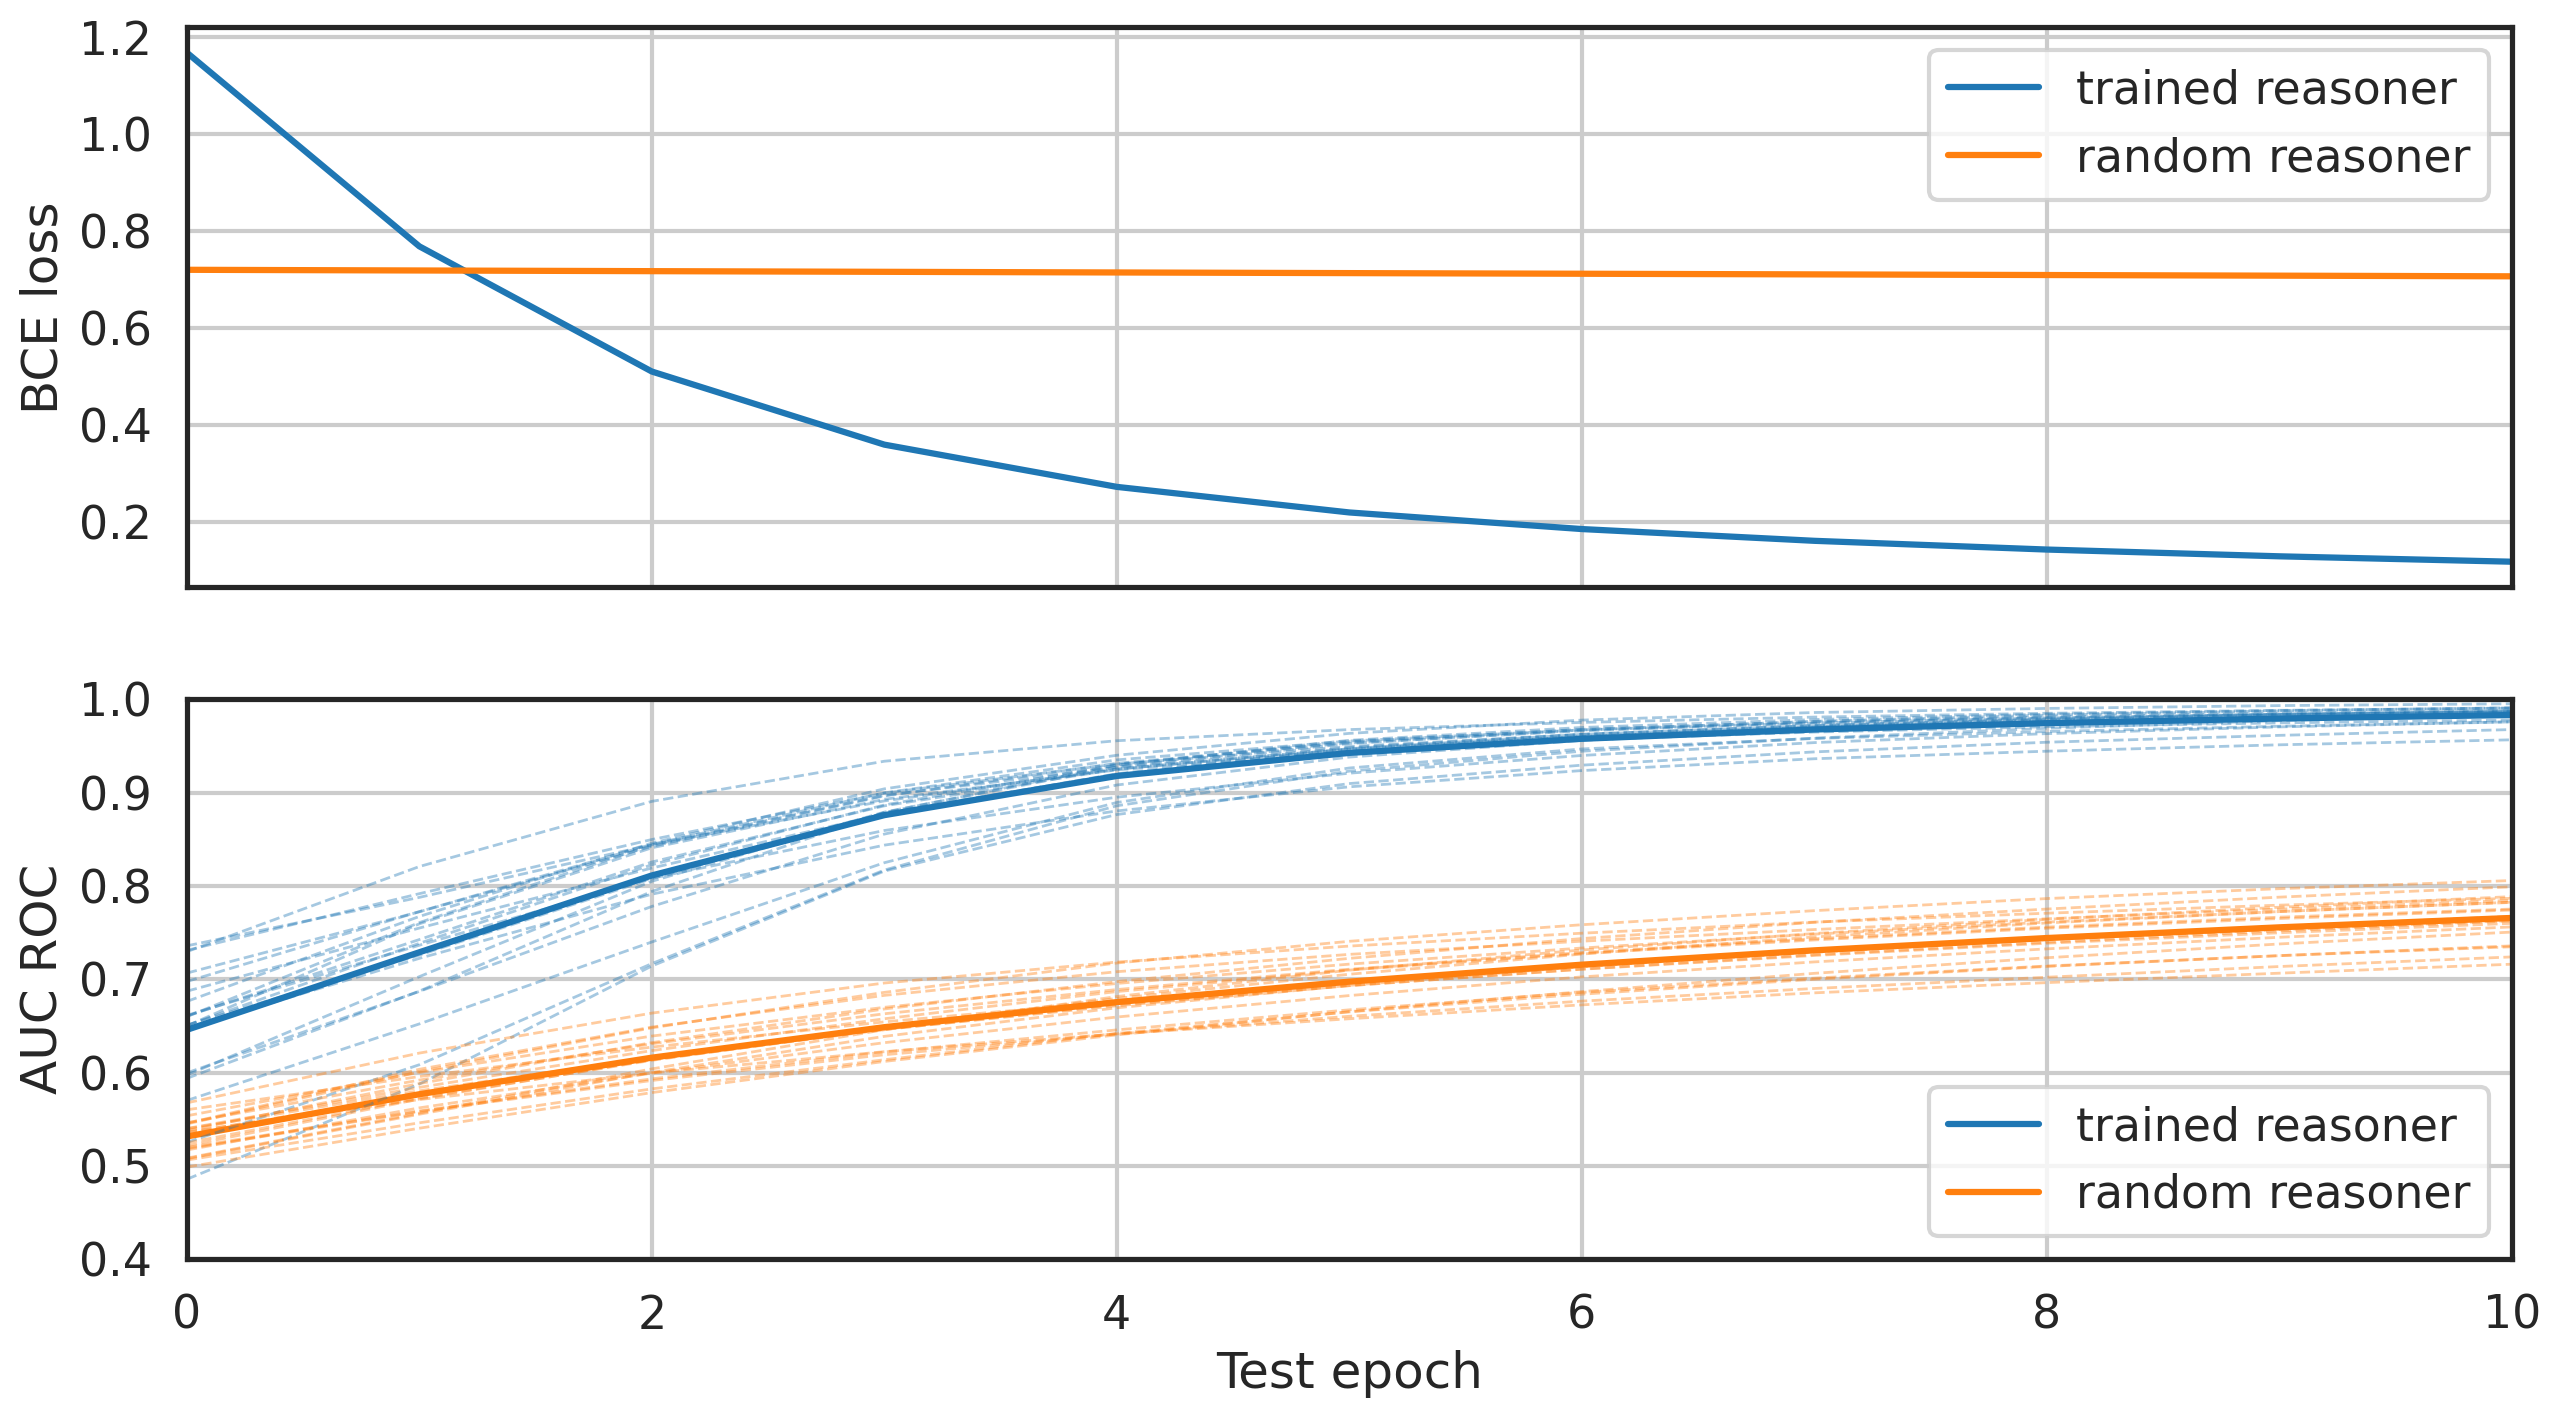

             mean       std     micro
acc      0.959075  0.014438  0.959075
prec     0.959141  0.026331  0.959271
recall   0.845993  0.045968  0.847746
f1       0.898682  0.035226  0.900067
auc_roc  0.982990  0.008883  0.983980
auc_pr   0.961390  0.018564  0.963644
             mean       std     micro
acc      0.287375  0.027590  0.287375
prec     0.231894  0.030550  0.232159
recall   0.987012  0.012017  0.987236
f1       0.374628  0.039972  0.375917
auc_roc  0.765613  0.024266  0.766383
auc_pr   0.558881  0.052247  0.563443


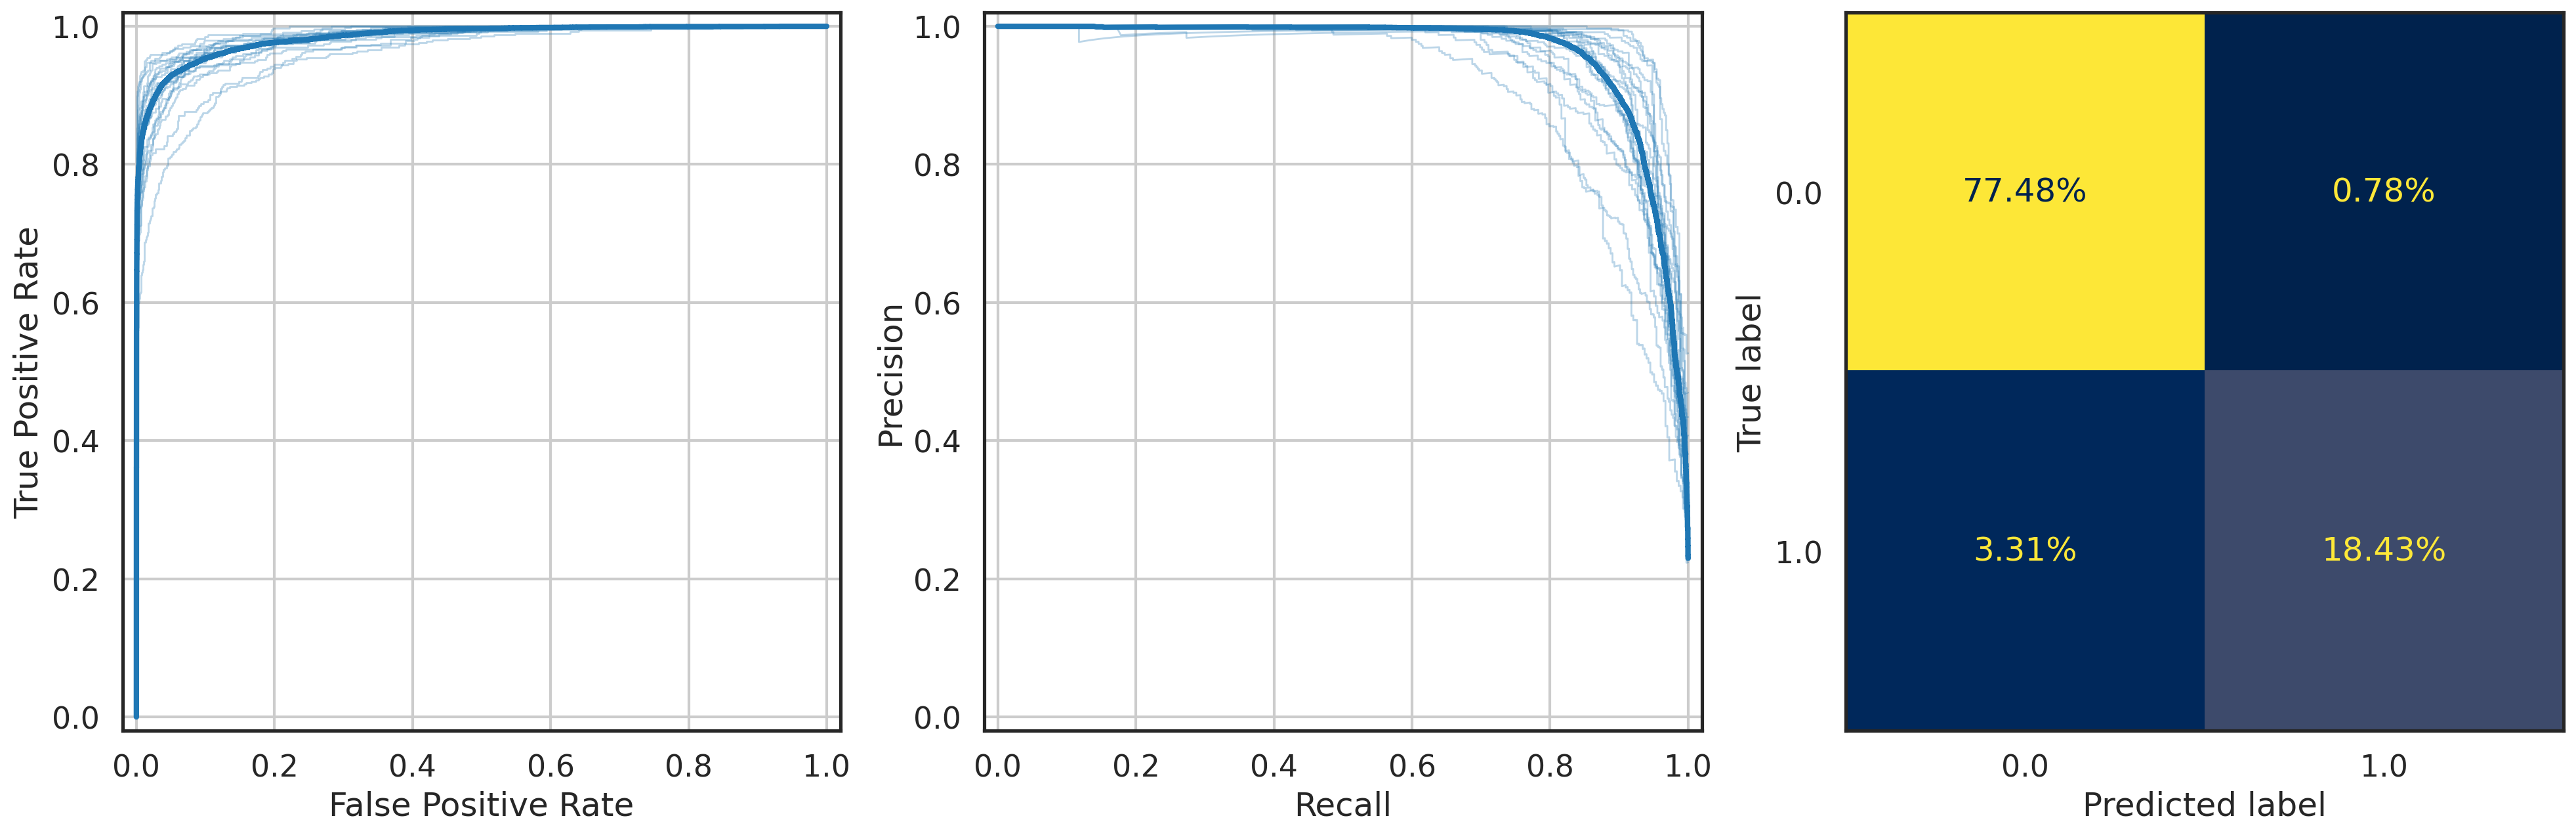

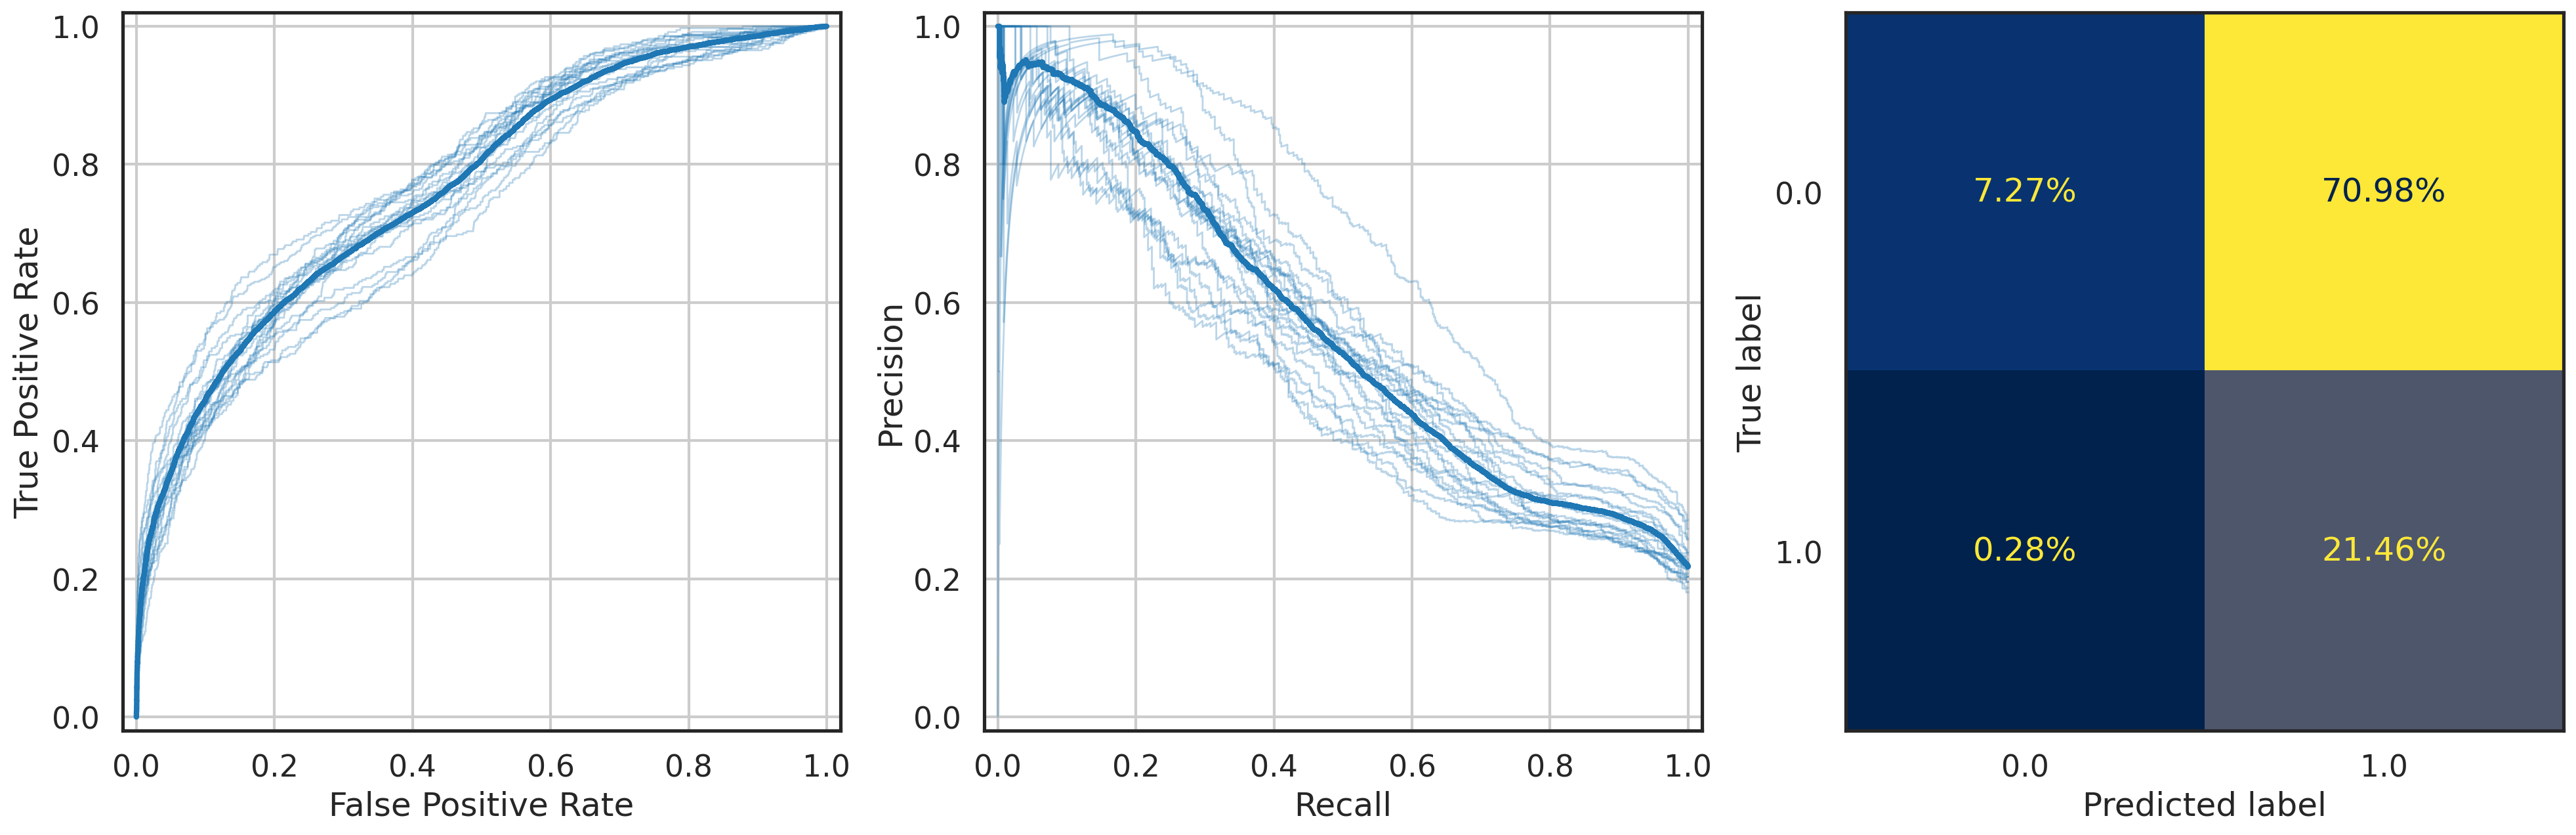

In [7]:
base = 'local/out/exp/' + ts
mkdirp(base)
print(base)

T.save(trained_reasoner.state_dict(), base+'/reasoner.pt')
df_tr = pd.DataFrame(train_logger.history_tr)
df_vl = pd.DataFrame(train_logger.history_vl)
df_tr.to_csv(base+'/train.csv', index=False)
df_vl.to_csv(base+'/valid.csv', index=False)
plot_train_history(df_tr, df_vl, save=base+'/train.png')

test_history_by_onto = pd.DataFrame(test_logger.history_vl_by_onto)
test_history = pd.DataFrame(test_logger.history_vl)
test_results = pd.DataFrame(dict(idx_te=idx_te, y_te=y_te, Y_te_good=Y_te_good, Y_te_rand=Y_te_rand))
test_history.to_csv(base+'/test.csv', index=False)
test_history_by_onto.to_csv(base+'/test-grouped.csv', index=False)
test_results.to_csv(base+'/test-results.csv', index=False)
plot_test_history(test_history, test_history_by_onto, save=base+'/test.png')
print(report(test_onto, y_te, np.array(Y_te_good), idx_te, save=base+'/%-trained'))
print(report(test_onto, y_te, np.array(Y_te_rand), idx_te, save=base+'/%-random'))